# Imports

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path

# Constants

In [7]:
IMG_SRC = Path("../images")
IMG_SRC.mkdir(parents=True, exist_ok=True)
SAMPLE_PLT = IMG_SRC / "sample-plot.png"
HEART_DISEASE_PLT = IMG_SRC / "heart-disease-analysis-plot.png"
DATA_SRC = Path("../data")
DATA_SRC.mkdir(parents=True, exist_ok=True)
CAR_SALES_DATA_FILE = DATA_SRC / "car-sales.csv"
HEART_DISEASE_DATA_FILE = DATA_SRC / "heart-disease.csv"

# Work Area

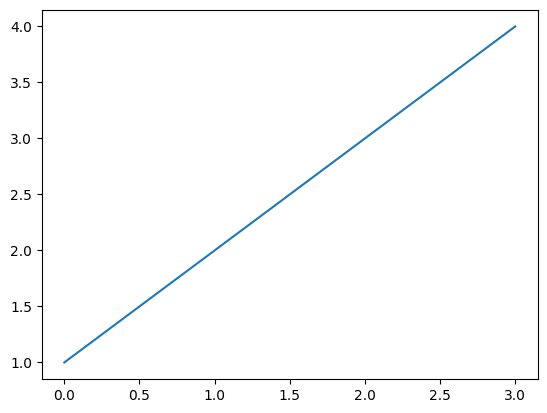

In [8]:
plt.plot([1,2,3,4]);

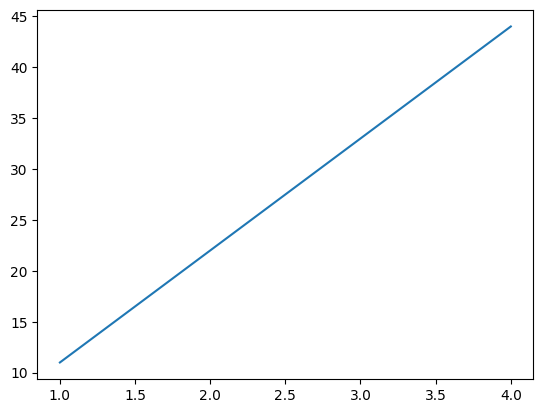

In [9]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

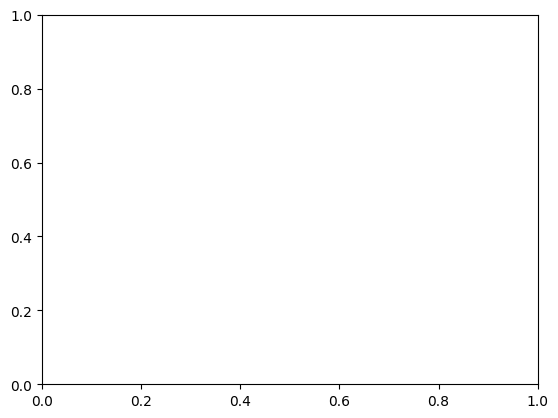

In [10]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # add some axes
plt.show();

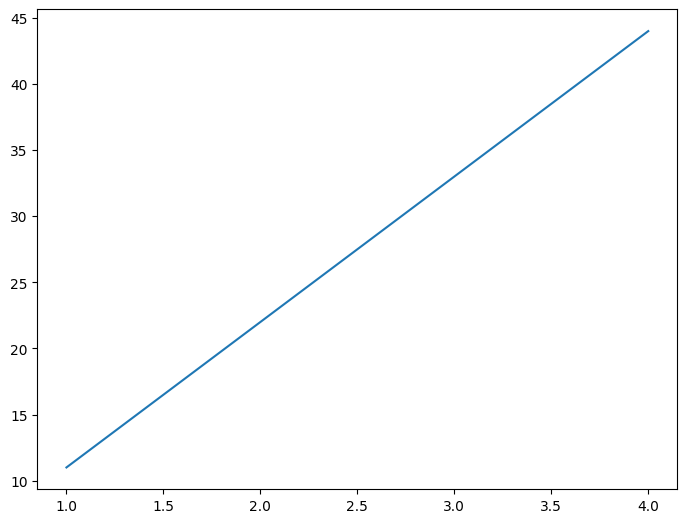

In [11]:
# 2nd method
fig = plt.figure() # create a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x, y)
plt.show();

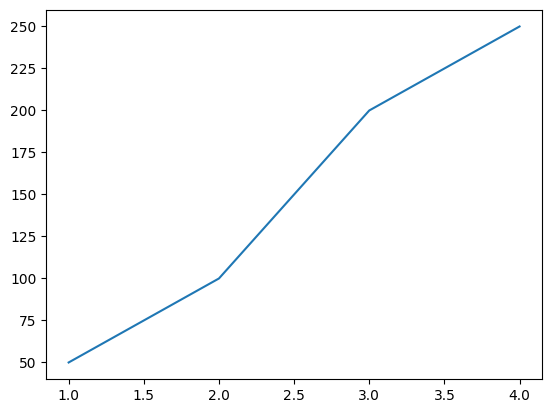

In [12]:
# 3rd method (recommended OO API)
fig, ax = plt.subplots()
ax.plot(x, [50,100,200,250]); # add some data

In [13]:
type(fig),type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

## Matplotlib example workflow

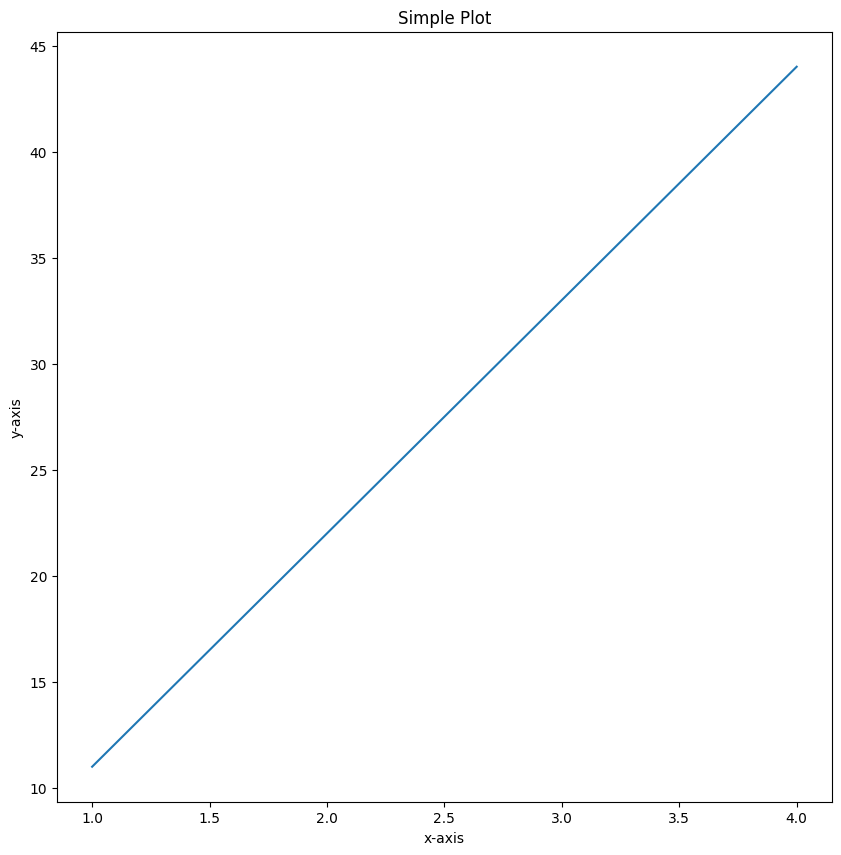

In [14]:
# 1. prepare data
x = [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10)) # width, height

# 3. Plot the data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
       ylabel="y-axis")

# 5. Save and show the whole figure
fig.savefig(SAMPLE_PLT)

## Making fures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [15]:
# Create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

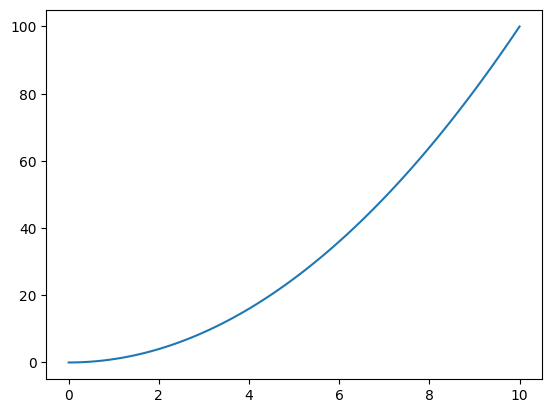

In [16]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

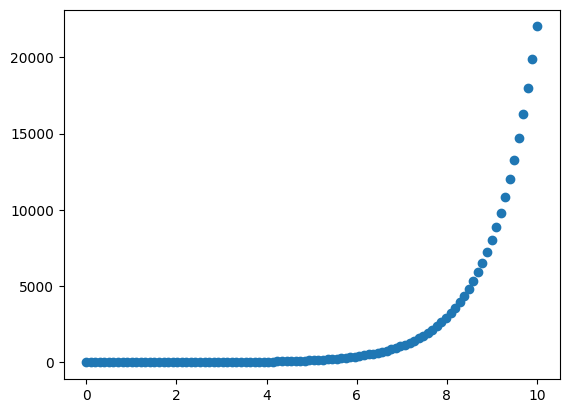

In [17]:
# Use the same data to make scatter
fix, ax = plt.subplots()
ax.scatter(x, np.exp(x));

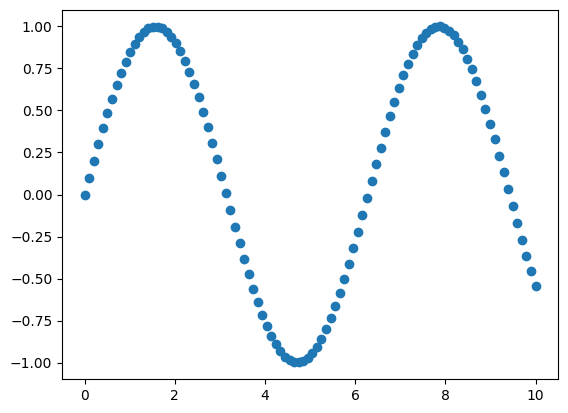

In [18]:
# Another scatter plot
fix, ax = plt.subplots()
ax.scatter(x, np.sin(x));

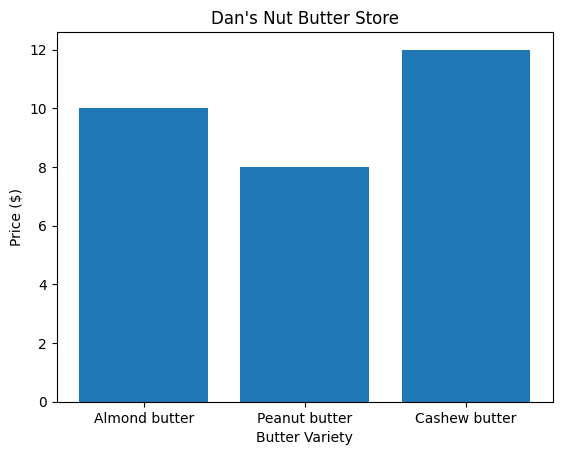

In [19]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)", xlabel="Butter Variety");

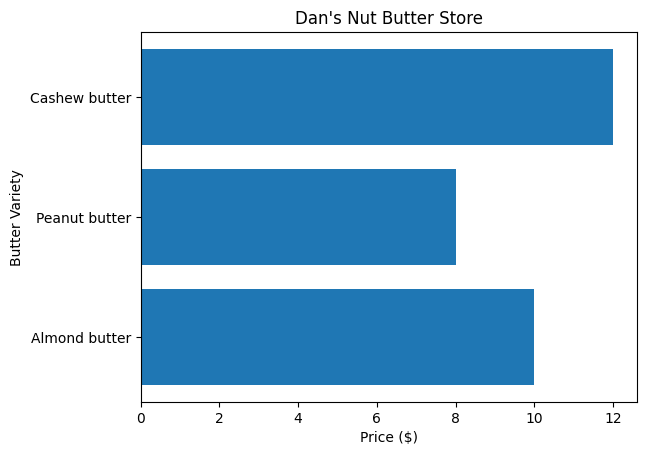

In [20]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))
ax.set(title="Dan's Nut Butter Store", xlabel="Price ($)", ylabel="Butter Variety");

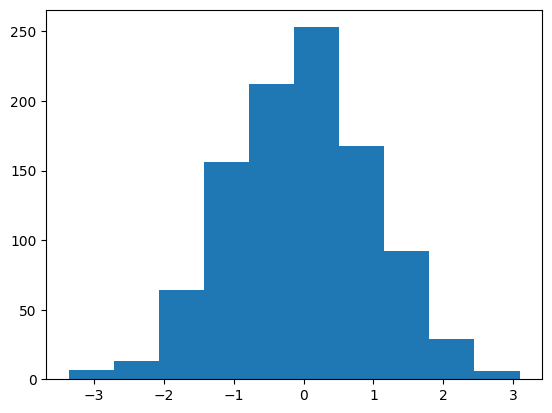

In [21]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for  subplots

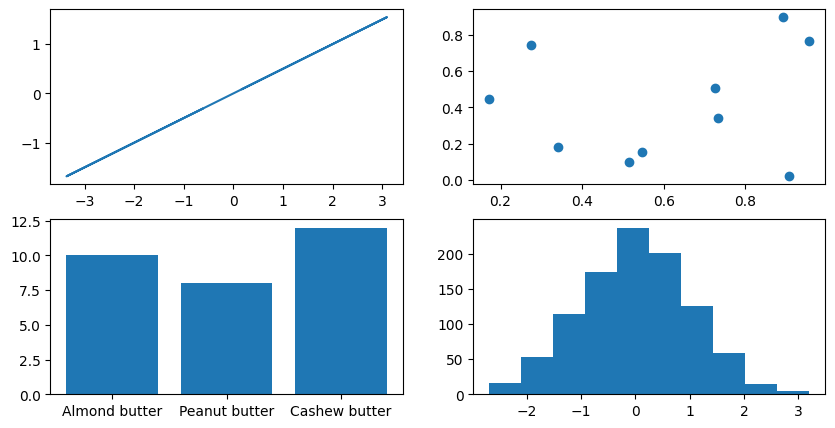

In [22]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                           ncols=2,
                                           figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax4.hist(np.random.randn(1000));

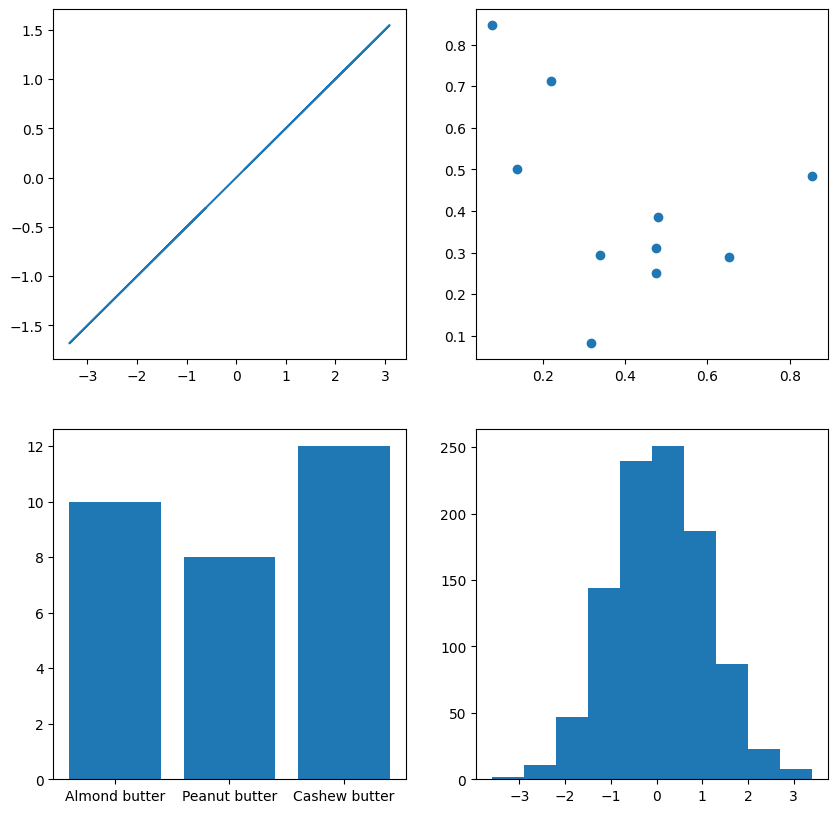

In [23]:
# Subplots option 2

fix, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10,10))

# Plot to each different index
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1,1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [24]:
# Make a dataframe
car_sales = pd.read_csv(CAR_SALES_DATA_FILE)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


<Axes: >

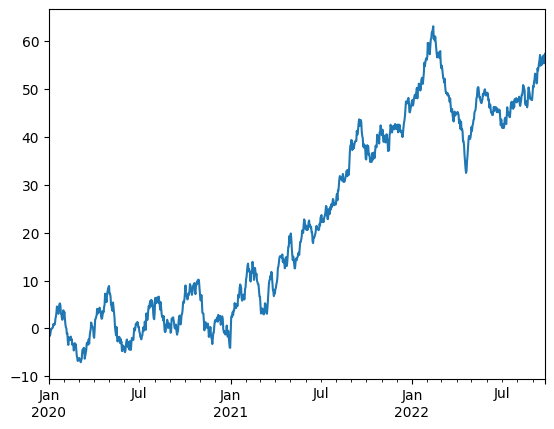

In [25]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2020', periods=1000))

ts = ts.cumsum()
ts.plot()

In [26]:
type(car_sales["Price"])

pandas.core.series.Series

In [27]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [28]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [29]:
type(car_sales["Price"][0])

numpy.int64

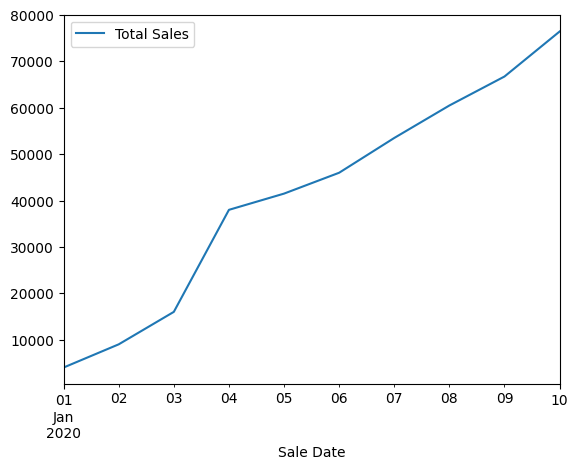

In [30]:
car_sales.plot(x="Sale Date", y="Total Sales");

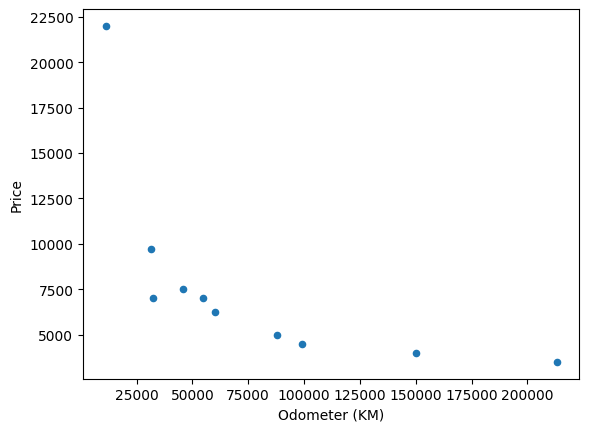

In [31]:
car_sales.plot(x="Odometer (KM)", y="Price",kind="scatter");

In [32]:
 # How about a bar graph?
x = np.random.rand(10,4)

# Turn it into a dataframe
df = pd.DataFrame(x, columns=(['a','b','c','d']))
df

,a,b,c,d
0,0.201438,0.003987,0.195968,0.703126
1,0.395629,0.957443,0.346963,0.954231
2,0.374600,0.584462,0.385841,0.250003
3,0.293154,0.456694,0.778878,0.986711
4,0.089778,0.045133,0.883532,0.895499
5,0.067607,0.285098,0.940968,0.598761
6,0.253651,0.998637,0.025100,0.486641
7,0.379207,0.775002,0.840043,0.741598
8,0.228321,0.755826,0.162945,0.580700
9,0.283327,0.128367,0.910936,0.965313


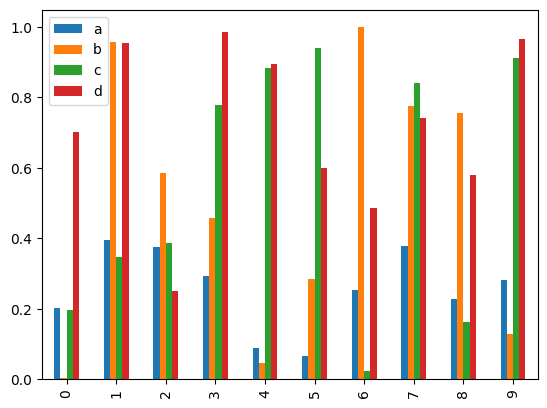

In [33]:
df.plot.bar();

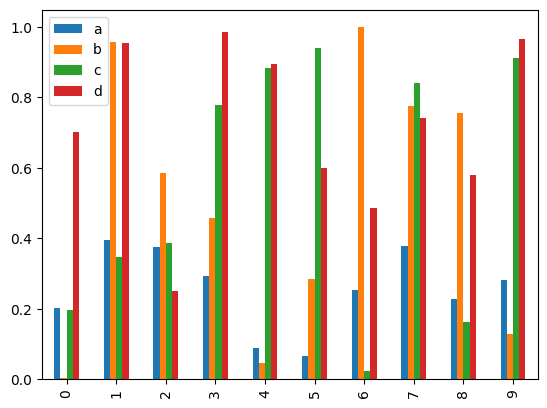

In [34]:
 df.plot(kind="bar");

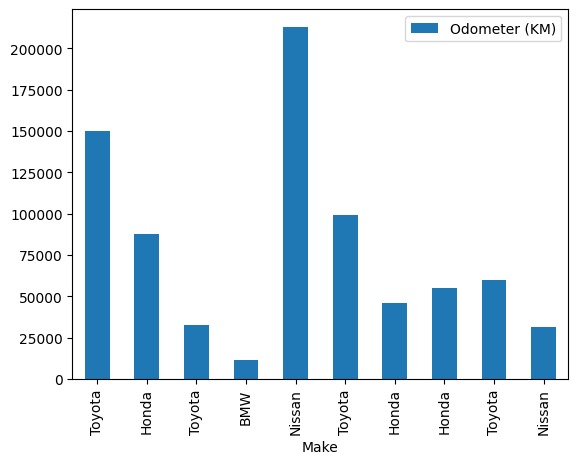

In [35]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

<Axes: ylabel='Frequency'>

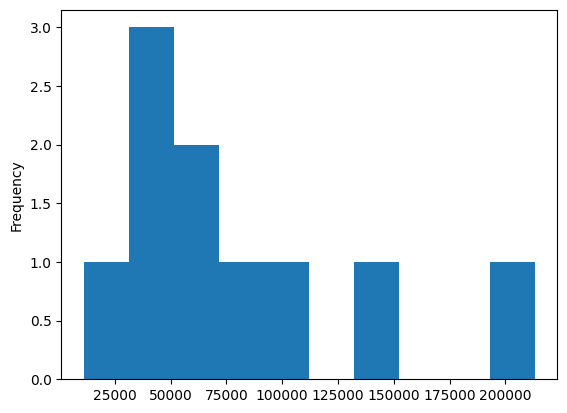

In [36]:
# How about histograms
car_sales["Odometer (KM)"].plot.hist()

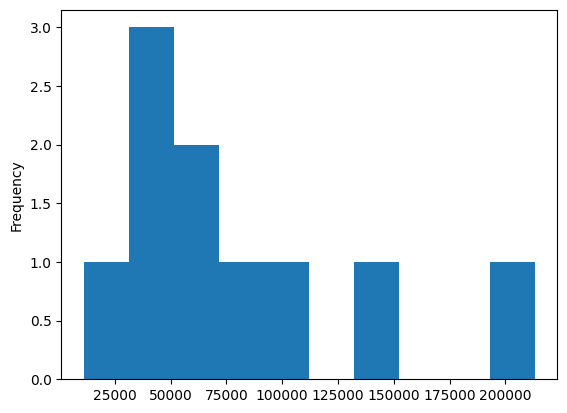

In [37]:
car_sales["Odometer (KM)"].plot(kind="hist");

<Axes: ylabel='Frequency'>

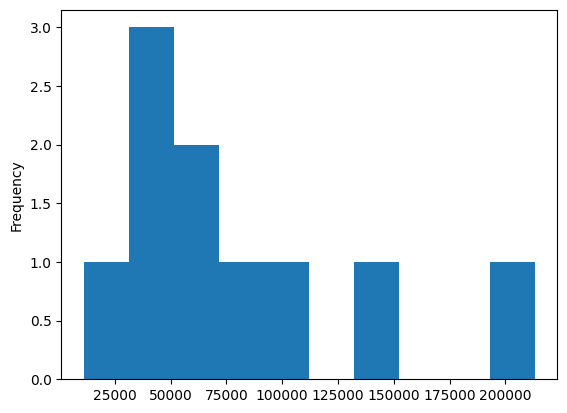

In [38]:
car_sales["Odometer (KM)"].plot.hist(bins=10)

In [39]:
heart_disease = pd.read_csv(HEART_DISEASE_DATA_FILE)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


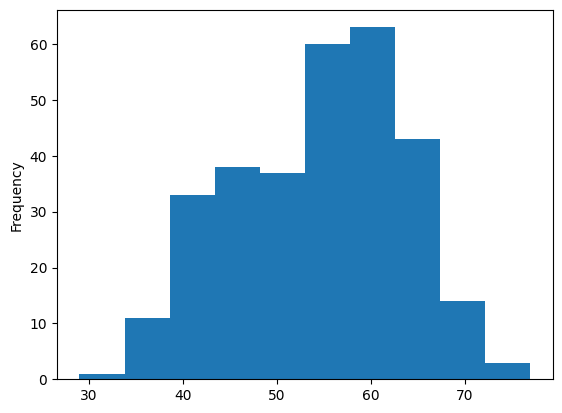

In [40]:
heart_disease["age"].plot.hist(bins=10);

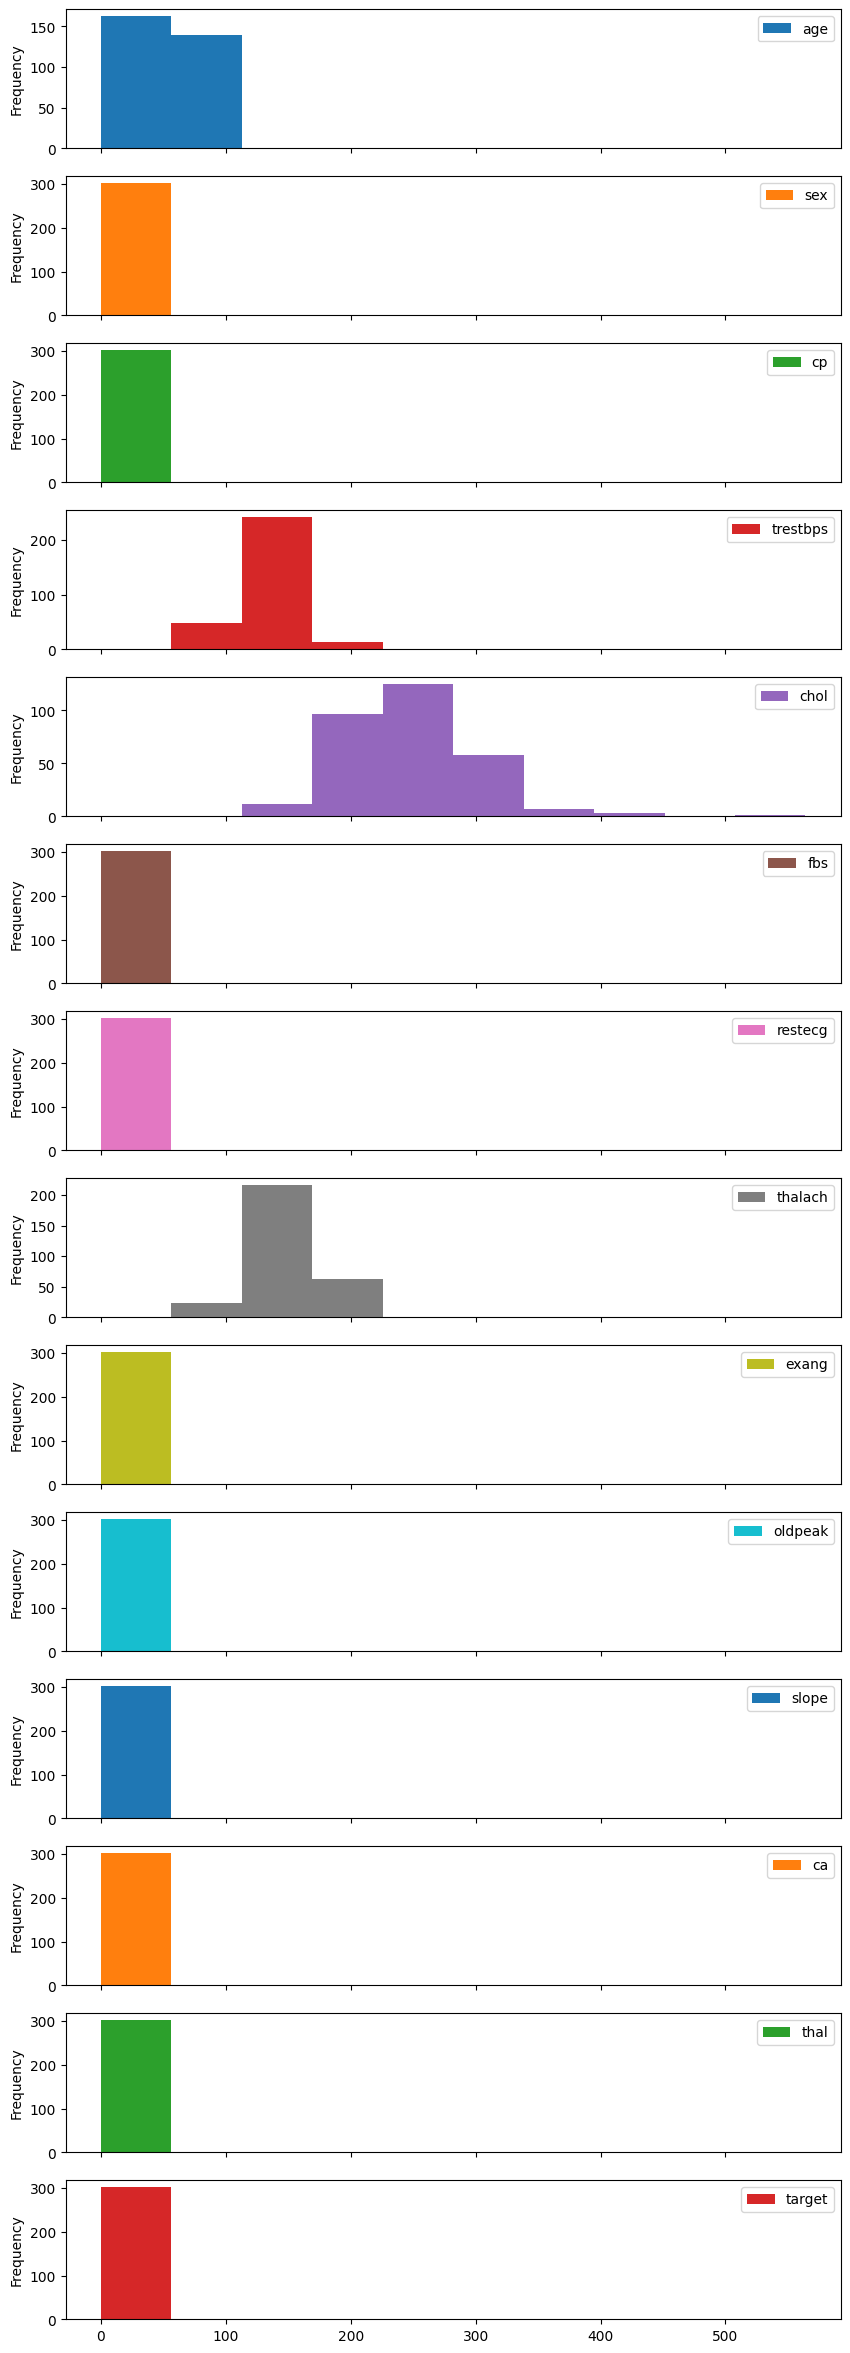

In [41]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method)

* When plotting something quickly, okay to use pyplot method
* When plotting somethign more advanced, use the OO method

In [42]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [43]:
len(over_50)

208

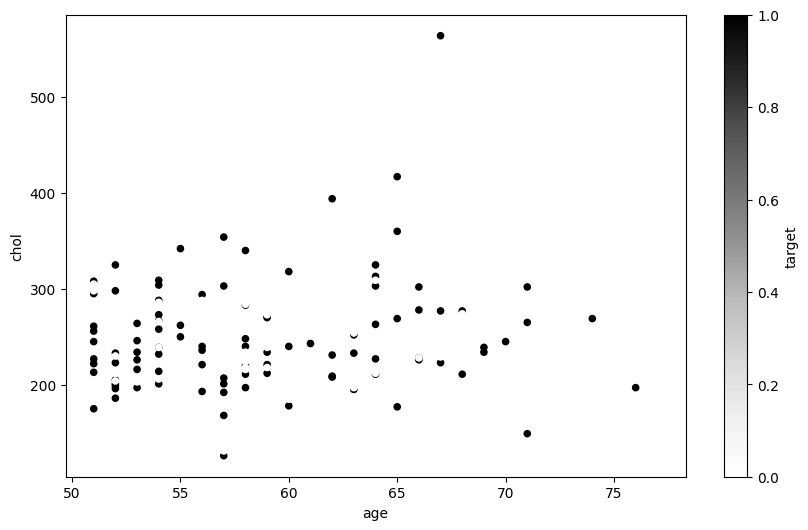

In [44]:
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            figsize=(10,6));

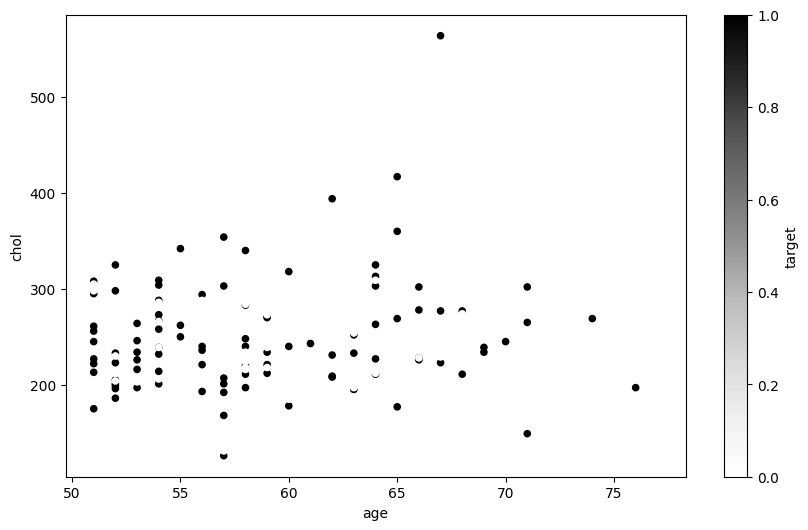

In [45]:
# OO method mixed with pyplot
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

# ax.set_xlim([45,100]);

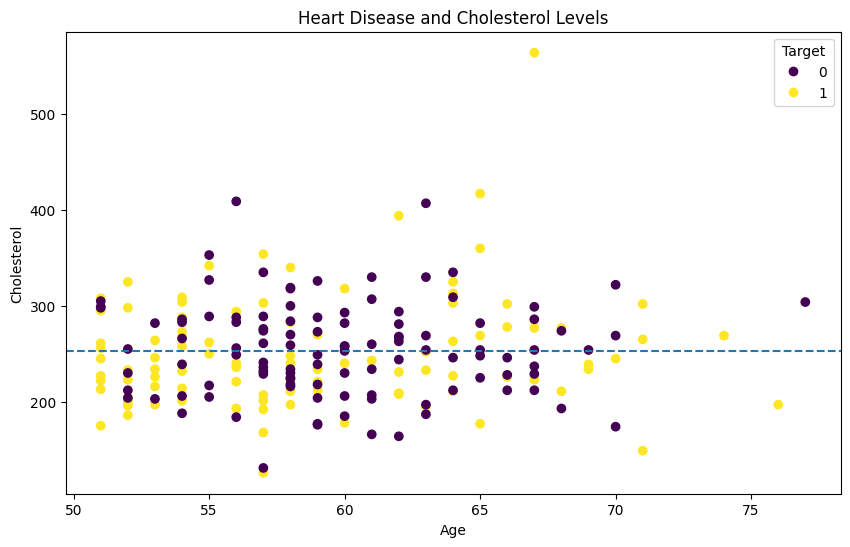

In [46]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot data
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target']);


# Customize
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--",
          label="Mean Chol");
               
# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

In [47]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


Text(0.5, 0.98, 'Heart Disease Analysis')

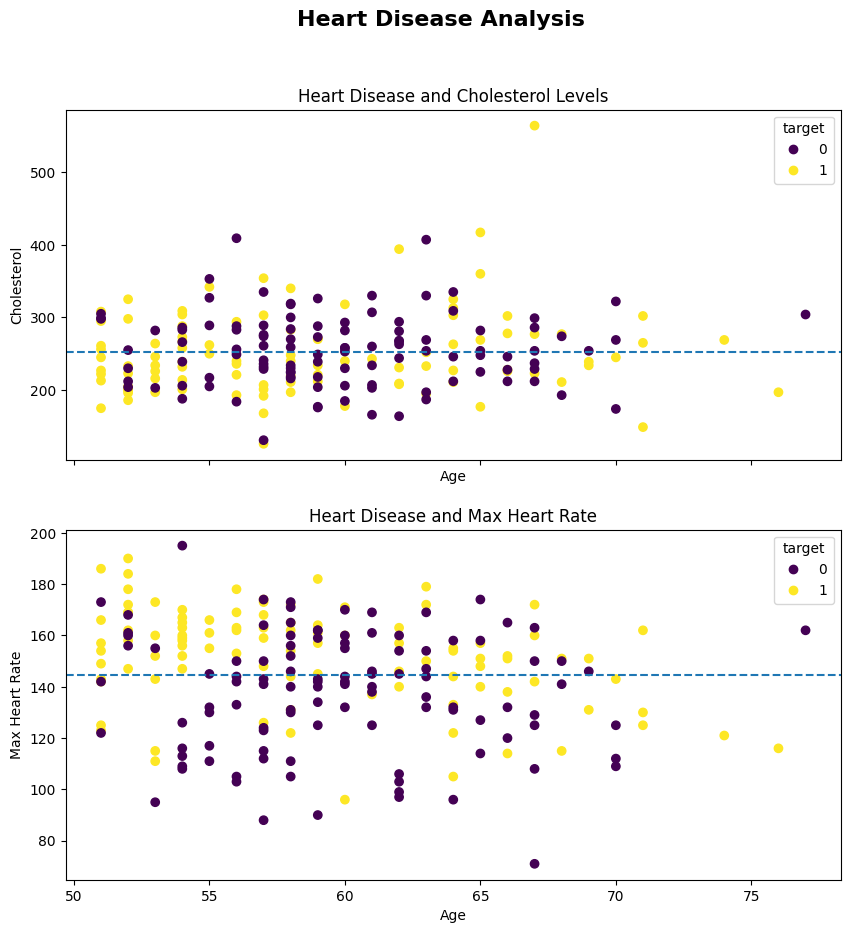

In [48]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                                sharex=True)
    
# Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])

# Customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
       xlabel='Age',
       ylabel='Cholesterol')
# Add a legend
ax0.legend(*scatter.legend_elements(), title='target')
# Add a meanline
ax0.axhline(y=over_50['chol'].mean(),
           linestyle='--')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'])

# Customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate')
# Add a legend
ax1.legend(*scatter.legend_elements(), title='target')
# Add a meanline
ax1.axhline(y=over_50['thalach'].mean(),
           linestyle='--');

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

## Customizing Matplotlib plots and getting stylish

In [49]:
# see the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [50]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


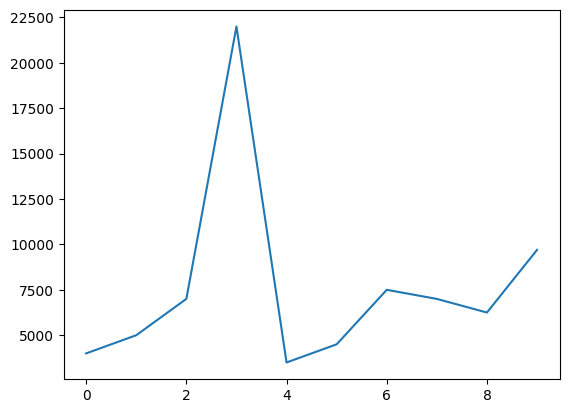

In [51]:
car_sales["Price"].plot();

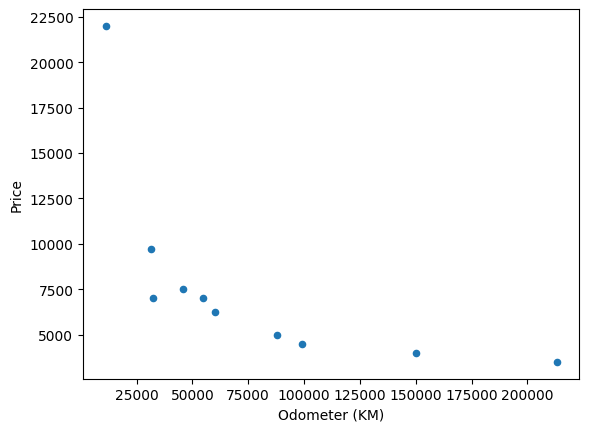

In [52]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

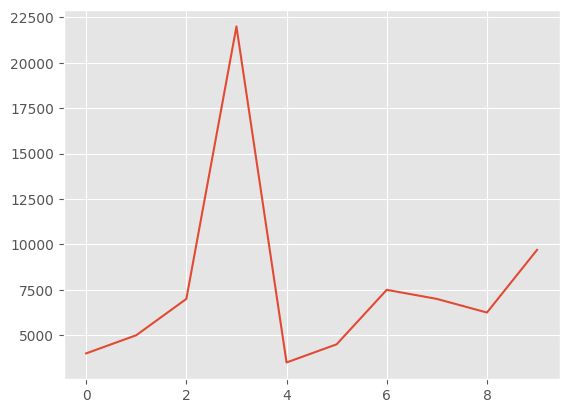

In [53]:
plt.style.use("ggplot")
car_sales["Price"].plot();

In [54]:
# Create some data
x = np.random.randn(10, 4)
x

array([[ 4.21440964e-02,  1.55215683e+00, -7.20125204e-01,
        -3.87135278e-01],
       [ 4.79663789e-01,  3.09302453e-02, -4.67566740e-01,
        -1.41898562e+00],
       [-1.92233633e-01,  7.06192628e-01, -3.31936153e-01,
        -4.87541670e-01],
       [ 9.89839966e-01,  1.62821085e-03, -3.34022273e-02,
         3.76648748e-02],
       [-1.09497977e+00,  3.59915211e-01, -7.69325104e-01,
        -6.44804422e-01],
       [ 5.64072609e-01,  1.11365873e+00, -1.32142167e-01,
        -8.95694758e-01],
       [ 1.21766943e+00, -1.50108368e+00,  5.63379408e-02,
        -7.82437231e-01],
       [-1.56760529e+00, -2.20868197e+00,  1.28225591e+00,
        -5.67356476e-01],
       [ 7.83415630e-01, -5.34467998e-01,  1.09192867e-01,
        -1.01741364e+00],
       [ 4.87618721e-01, -2.50739920e-01, -1.26264083e+00,
         5.17336613e-01]])

In [55]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.042144,1.552157,-0.720125,-0.387135
1,0.479664,0.030930,-0.467567,-1.418986
2,-0.192234,0.706193,-0.331936,-0.487542
3,0.989840,0.001628,-0.033402,0.037665
4,-1.094980,0.359915,-0.769325,-0.644804
5,0.564073,1.113659,-0.132142,-0.895695
6,1.217669,-1.501084,0.056338,-0.782437
7,-1.567605,-2.208682,1.282256,-0.567356
8,0.783416,-0.534468,0.109193,-1.017414
9,0.487619,-0.250740,-1.262641,0.517337


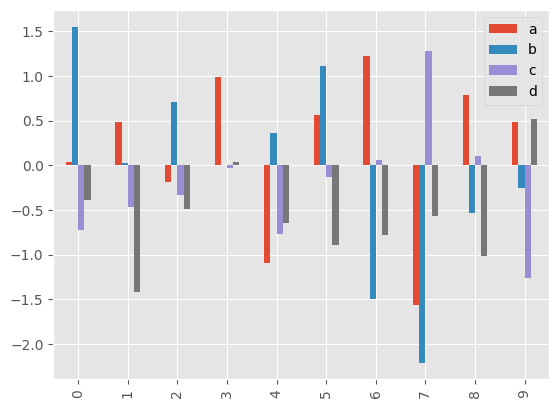

In [56]:
ax = df.plot(kind='bar')

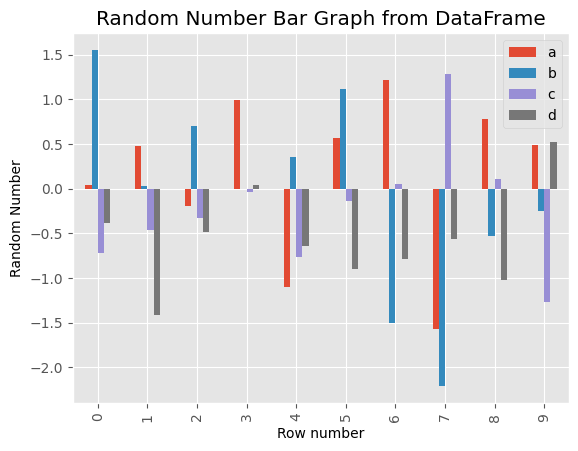

In [57]:
# Customize the plot with the set() method
ax = df.plot(kind='bar')
# Add some labels and title
ax.set( title="Random Number Bar Graph from DataFrame",
      xlabel="Row number",
      ylabel="Random Number")
# Make the legend visibile
ax.legend().set_visible(True)

C:\Users\OITAACMeineI\AppData\Local\Temp\ipykernel_18192\2110345815.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


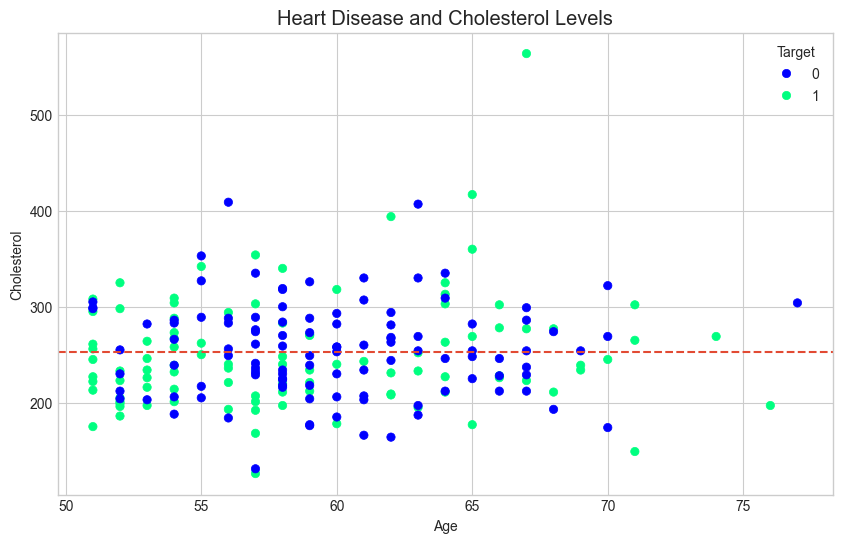

In [58]:
# Set the style
plt.style.use('seaborn-whitegrid')
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

# Plot data
scatter = ax.scatter(x=over_50['age'],
                    y=over_50['chol'],
                    c=over_50['target'],
                    cmap="winter");


# Customize
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol")

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle="--",
          label="Mean Chol");
               
# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");


Text(0.5, 0.98, 'Heart Disease Analysis')

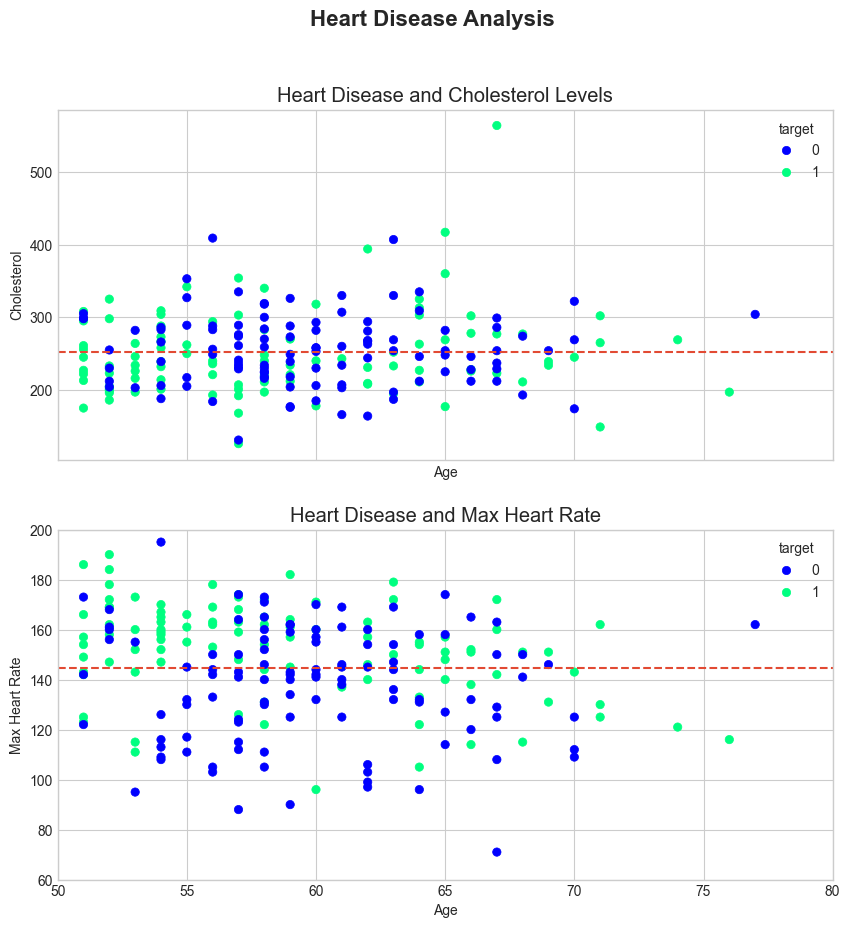

In [59]:
# Customizing the y and x limitations

fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                                sharex=True)
    
# Add data to ax0
scatter = ax0.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'],
                     cmap="winter")

# Customize ax0
ax0.set(title='Heart Disease and Cholesterol Levels',
       xlabel='Age',
       ylabel='Cholesterol')

# Change the x axes limit
ax0.set_xlim([50,80])
# Add a legend
ax0.legend(*scatter.legend_elements(), title='target')
# Add a meanline
ax0.axhline(y=over_50['chol'].mean(),
           linestyle='--')

# Add data to ax1
scatter = ax1.scatter(x=over_50['age'],
                     y=over_50['thalach'],
                     c=over_50['target'],
                     cmap="winter")

# Customize ax1
ax1.set(title='Heart Disease and Max Heart Rate',
       xlabel='Age',
       ylabel='Max Heart Rate')
# Change the x axes limit
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend
ax1.legend(*scatter.legend_elements(), title='target')
# Add a meanline
ax1.axhline(y=over_50['thalach'].mean(),
           linestyle='--');

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

In [60]:
fig.savefig(HEART_DISEASE_PLT)